# KickStarter Consulting
-----

# Initial Analysis on Crowdfunding Platform

Kickstarter, the crowdfunding platform, is thinking about providing a consulting service to project founders to help its customers create more successful crowdfunding campaigns. You’ve been asked to do some initial analysis.


In order to complete this assignment, please follow the link and download the following Kickstarter dataset: http://bit.ly/2cgMGDm. Use the dataset to complete this task.


A short and simple Google Slide of the results can be seen here: https://drive.google.com/file/d/1aHoNMABEJYRKbsnHIbQWJqwR9c7LrWS_/view?usp=sharing


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime



In [8]:
# Set the figure properties
sns.set(font_scale=1.7 , context='paper' , style='dark')
sns.set_palette( palette=sns.diverging_palette(260, 133, l=60, center="dark"))

In [9]:
file = pd.read_csv('DSI_kickstarterscrape_dataset.csv')

In [10]:
file.shape

(45957, 17)

In [11]:
file.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


# Part 1: Foundational Data Analysis

### 1- What is the mean (total) pledge that projects get? (not per backer) *

In [16]:
round(file.pledged.mean(),2)

4980.75

### 2- Create a histogram that shows the distribution for number of backers. What is the skew of the distribution? 

In [17]:
file.backers.describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

Text(0.5,1,'Backers Distribution')

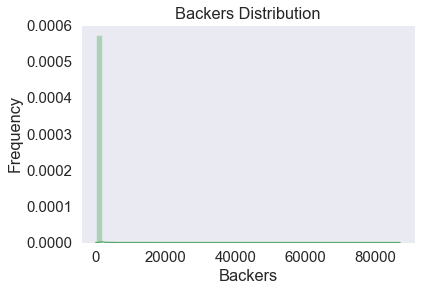

In [18]:
sns.distplot(file.backers , color="g")
plt.xlabel('Backers' )
plt.ylabel('Frequency')
plt.title('Backers Distribution')


Right skewed distribution

### 3- Is the ‘duration’ variable normally distributed? *


Text(0.5,1,'Duration Distribution')

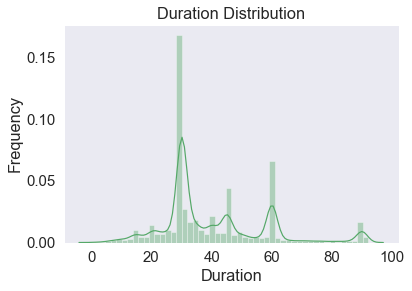

In [19]:
sns.distplot(file.duration , kde = True, color="g")
plt.xlabel('Duration' )
plt.ylabel('Frequency')
plt.title('Duration Distribution')

In [21]:
file.duration.mean()

39.995546924297706

In [22]:
file.duration.mode()

0    30.0
dtype: float64

In [23]:
file.duration.median()

32.0

The mean, mode and median are all not equal. So, ‘duration’ variable is **not normally** distributed.

In [20]:
from scipy import stats
s , p = stats.normaltest(file.duration)

alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 0
The null hypothesis can be rejected


### 4 If you could collect data on another attribute of these projects, what would it be and why?

we can add information like:
* Number of project creators.
* Number of projects that Creator has Created.
* Is there a video for the project.
* Is their pictures for the project.

________
_______


# Part 2:

In [24]:
file.describe()

,project id,goal,pledged,funded_percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [25]:
successful_projects = file.loc[ (file.status== 'successful'), :]
failed_projects = file.loc[ (file.status== 'failed'), :]

### 1 What's the best length of time to run a campaign

Text(0.5,1,'Duration for each Project Statue')

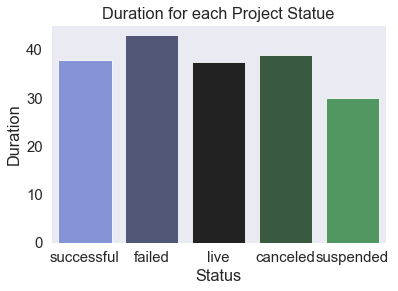

In [26]:
sns.barplot(x='status', y='duration', data=file , palette=sns.diverging_palette(260, 133, l=60, n=5, center="dark") ,ci=None )
plt.xlabel('Status' )
plt.ylabel('Duration')
plt.title('Duration for each Project Statue')


In general, there is no specific length of time for running a campaign successfully.

Text(0.5,1,'Backers by Duration in Successful Projects')

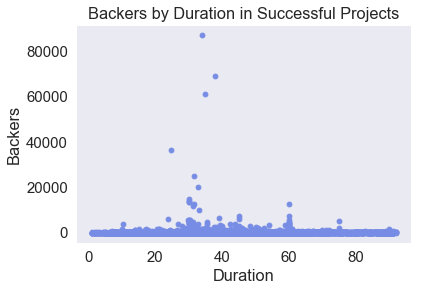

In [27]:
plt.plot( successful_projects.duration, successful_projects.backers , 'o' , )
plt.xlabel('Duration')
plt.ylabel('Backers')

plt.title('Backers by Duration in Successful Projects')


Text(0.5,1,'Funded percentage by Duration in Successful Projects')

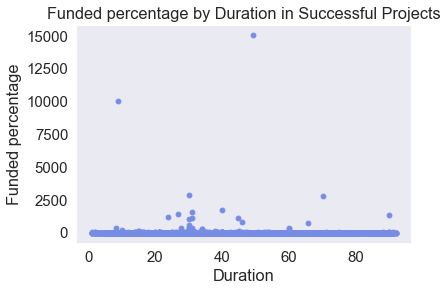

In [28]:
plt.plot( successful_projects.duration, successful_projects.funded_percentage , 'o')
plt.xlabel('Duration')
plt.ylabel('Funded percentage')

plt.title('Funded percentage by Duration in Successful Projects')

Text(0.5,1,'Levels by Duration in Successful Projects')

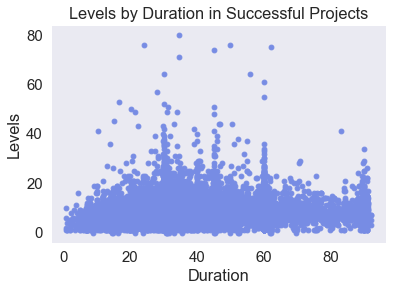

In [29]:
plt.plot( successful_projects.duration, successful_projects.levels , 'o')
plt.xlabel('Duration')
plt.ylabel('Levels')
plt.title('Levels by Duration in Successful Projects')

Text(0.5,1,'Comments by Duration in Successful Projects')

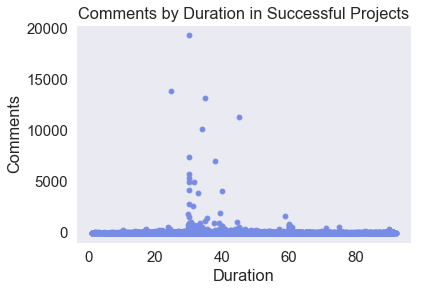

In [30]:
plt.plot( successful_projects.duration, successful_projects.comments , 'o')
plt.xlabel('Duration')
plt.ylabel('Comments')
plt.title('Comments by Duration in Successful Projects')

Text(0.5,1,'Pledged by Duration in Successful Projects')

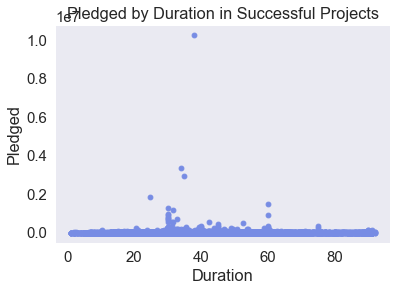

In [31]:
plt.plot( successful_projects.duration, successful_projects.pledged , 'o')
plt.xlabel('Duration')
plt.ylabel('Pledged')
plt.title('Pledged by Duration in Successful Projects')

The highest number of Backers, Funded percentage and Pledge in (20,40) interval for successful projects.

### 2 What's the ideal pledge goal

[[<matplotlib.axis.YTick at 0x115877550>,

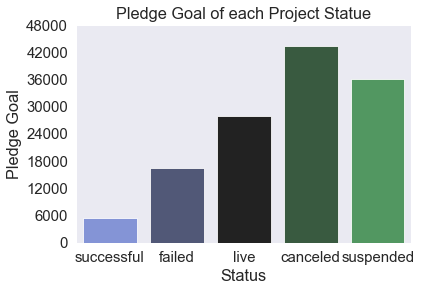

In [32]:
# Pledge Goals by Status
a = sns.barplot(x='status', y='goal', data=file , palette=sns.diverging_palette(260, 133, l=60, n=5, center="dark"),ci=None )
plt.xlabel('Status')
plt.ylabel('Pledge Goal')
plt.title('Pledge Goal of each Project Statue')
a.set( yticks = np.arange(0,50000,6000))

The ideal pledge goal for successful projects is less than 6000.

### 3  What type of projects would be most successful at getting funded?


Text(0.5,1,'Count of Successes for each category')

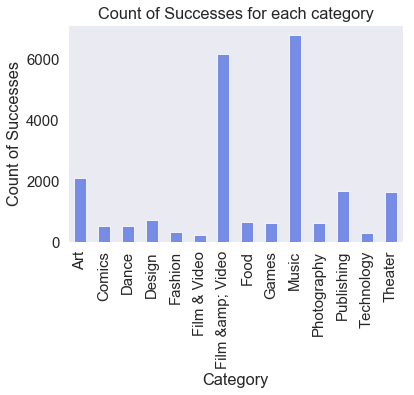

In [33]:
file[file.status == 'successful'].groupby('category').category.count().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count of Successes')
plt.title('Count of Successes for each category')

The most successful categories are: Music, Film &amp video and Art.

What is the difference between Film & video and Film &amp video ?????

Text(0.5,1,'Funded Percentage for successful Categories.')

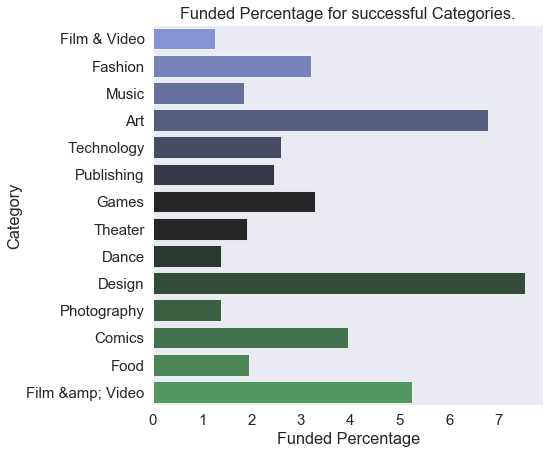

In [34]:
plt.subplots(figsize=(7,7))
sns.barplot(x='funded_percentage', y='category', data=successful_projects , palette=sns.diverging_palette(260, 133, l=60, n=14, center="dark"),ci=None )
plt.ylabel('Category')
plt.xlabel('Funded Percentage')
plt.title('Funded Percentage for successful Categories.')

The highest Funded Percentage categories are Disagin, Art and Film &amp video.


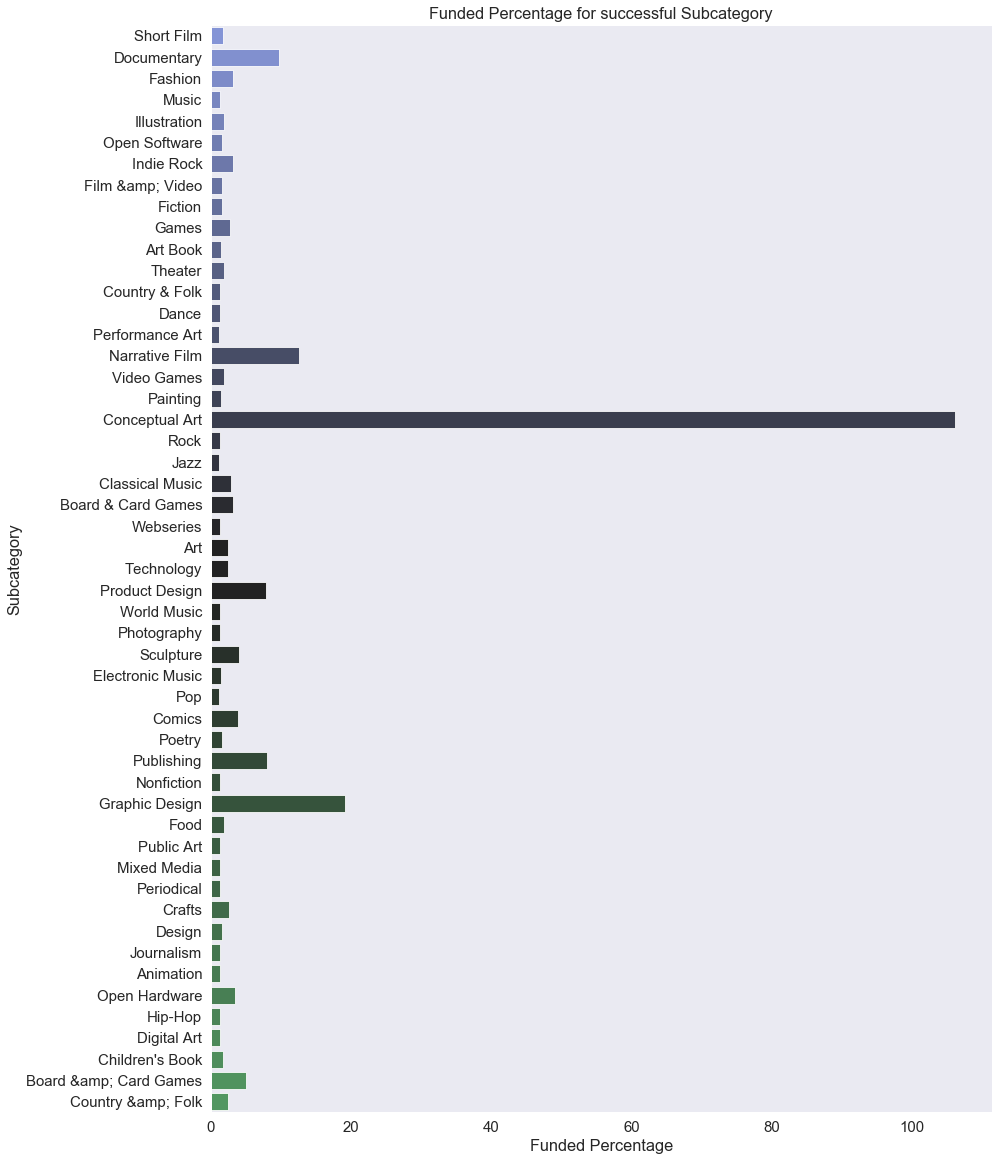

In [35]:
plt.subplots(figsize=(14,20))
sns.barplot(x='funded_percentage', y='subcategory', data=successful_projects,
            palette=sns.diverging_palette(260, 133, l=60,n=51, center="dark"),
            ci=None )

plt.ylabel('Subcategory')
plt.xlabel('Funded Percentage')
plt.title('Funded Percentage for successful Subcategory')

sns.set_context("paper",font_scale=2.4)

### 4   Is there an ideal month/day/time to launch a campaign?

In [36]:
file['year'] = [int(year[12:16]) for year in file.funded_date ]
file['month'] = [month[8:11] for month in file.funded_date ]
file['day'] = [day[0:3] for day in file.funded_date ]
file['time'] = [int(time[17:19]) for time in file.funded_date ]

In [37]:
dic_months = {'month':sorted(file.month.unique()),
              'successful':(file[(file.status == 'successful')]).groupby('month').month.count(),
              'failed':(file[(file.status == 'failed')]).groupby('month').month.count(),
              'live':(file[(file.status == 'live')]).groupby('month').month.count(),
              'canceled':(file[(file.status == 'canceled')]).groupby('month').month.count(),
              'suspended':(file[(file.status == 'suspended')]).groupby('month').month.count()              
             }
df_months = pd.DataFrame (dic_months)

In [39]:
months = pd.melt(df_months, id_vars="month", var_name="status", value_name="count")

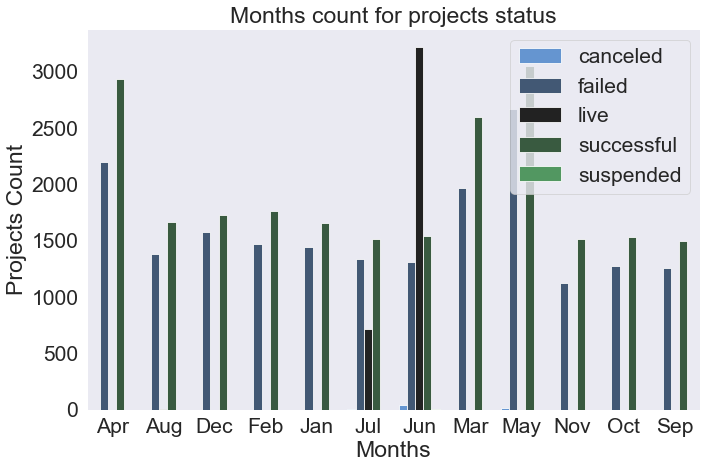

In [42]:
plt.subplots(figsize=(11,7))
sns.barplot(x='month', y='count', data=months , hue='status',palette=sns.diverging_palette(250, 133, l=60, n=5, center="dark"))

plt.ylabel('Projects Count')
plt.xlabel('Months')
plt.title('Months count for projects status')

plt.legend(loc='upper right')

In [43]:
dic_days = {'Days':sorted(file.day.unique()),
              'successful':(file[(file.status == 'successful')]).groupby('day').day.count(),
              'failed':(file[(file.status == 'failed')]).groupby('day').day.count(),
              'live':(file[(file.status == 'live')]).groupby('day').day.count(),
              'canceled':(file[(file.status == 'canceled')]).groupby('day').day.count(),
              'suspended':(file[(file.status == 'suspended')]).groupby('day').day.count()
             }
df_days = pd.DataFrame (dic_days)

In [44]:
days = pd.melt(df_days, id_vars="Days", var_name="Status", value_name="Count")

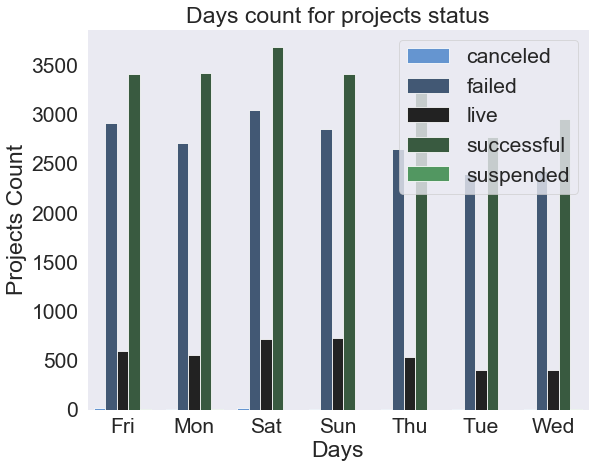

In [45]:
plt.subplots(figsize=(9,7))
sns.barplot(x='Days', y='Count', data=days , hue='Status',palette=sns.diverging_palette(250, 133, l=60, n=5, center="dark"))

plt.ylabel('Projects Count')
plt.xlabel('Days')
plt.title('Days count for projects status')
plt.legend(loc='upper right')

There is no specific good time to launch a successful campaign.

Text(0.5,1,'Time (Hours) count for projects status')

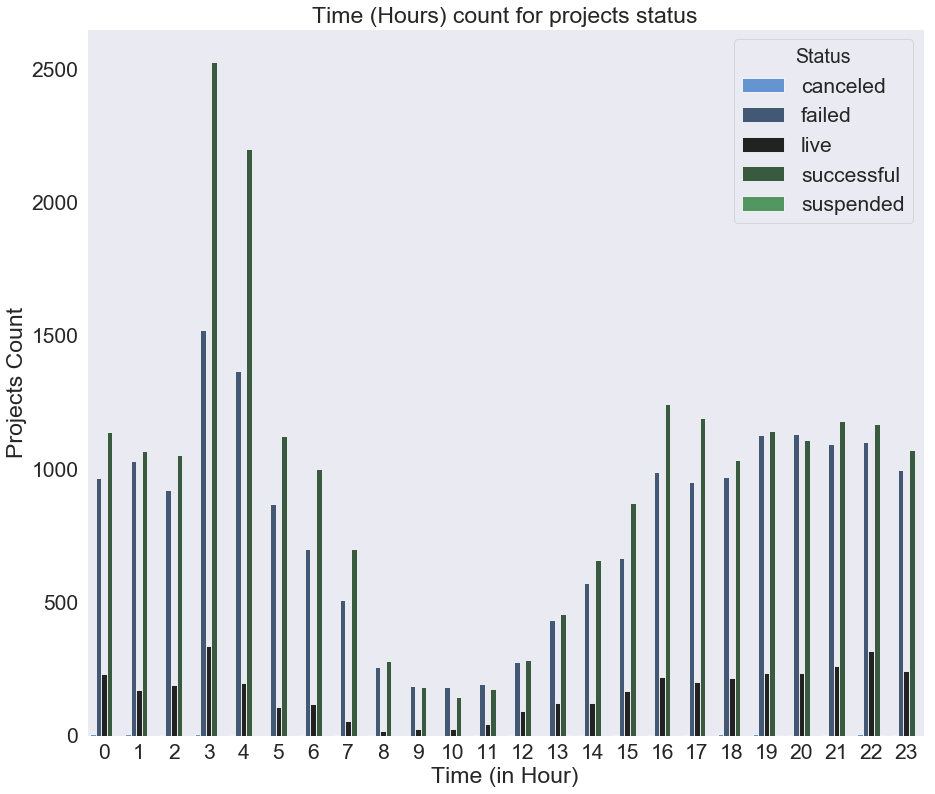

In [46]:
dic_time = {'time':sorted(file.time.unique()),
              'successful':(file[(file.status == 'successful')]).groupby('time').time.count(),
              'failed':(file[(file.status == 'failed')]).groupby('time').time.count(),
              'live':(file[(file.status == 'live')]).groupby('time').time.count(),
              'canceled':(file[(file.status == 'canceled')]).groupby('time').time.count(),
              'suspended':(file[(file.status == 'suspended')]).groupby('time').time.count()
             }
df_time = pd.DataFrame (dic_time)

times = pd.melt(df_time, id_vars="time", var_name="Status", value_name="Count")

plt.subplots(figsize=(15,13))
sns.barplot(x='time', y='Count', data=times , hue='Status',palette=sns.diverging_palette(250, 133, l=60, n=5, center="dark"))

plt.ylabel('Projects Count')
plt.xlabel('Time (in Hour)')
plt.title('Time (Hours) count for projects status')